In [1]:
%pylab inline

import matplotlib
import seaborn
seaborn.set(style="whitegrid")
rcParams['figure.figsize'] = (16, 5)
from IPython.display import Audio
import numpy as np
import librosa
import librosa.display
import pysptk
from scipy.io import wavfile

Populating the interactive namespace from numpy and matplotlib


In [43]:
sr, x = wavfile.read("../Neural-Vocoder-Experiment/ground-truth/LJ001-0002.wav")
# assert sr == 16000
x = x.astype(np.float64)
print(x.shape)

(41885,)


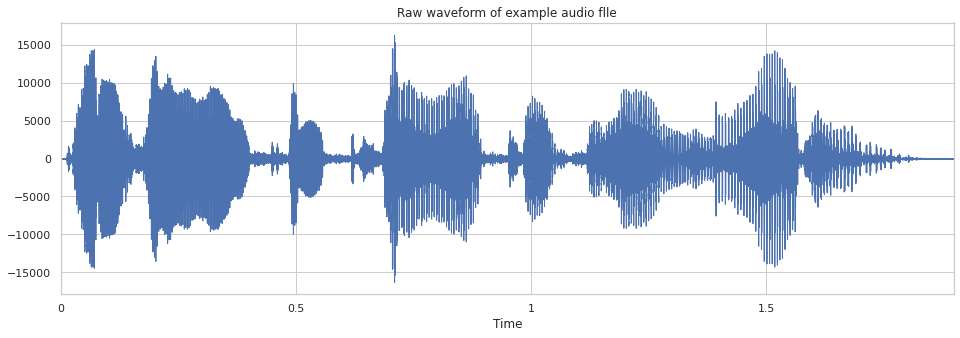

In [44]:
librosa.display.waveplot(x, sr=sr)
title("Raw waveform of example audio flle")
Audio(x, rate=sr)

In [66]:
frame_length = 1024
hop_length = 256

# Note that almost all of pysptk functions assume input array is C-contiguous and np.float64 element type
frames = librosa.util.frame(x, frame_length=frame_length, hop_length=hop_length).astype(np.float64).T

# Windowing
frames *= pysptk.blackman(frame_length)

assert frames.shape[1] == frame_length 

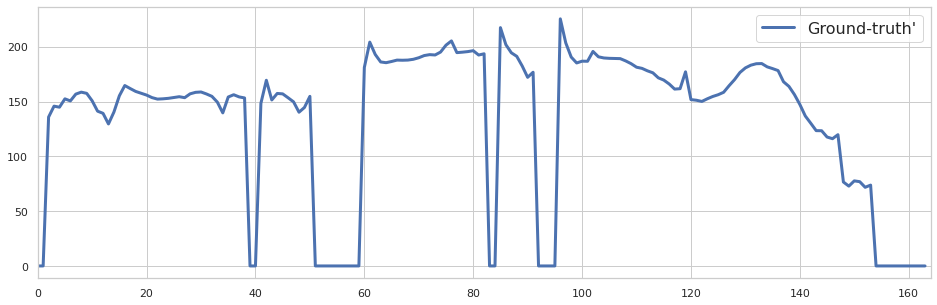

In [67]:
# F0 estimation
f0 = pysptk.rapt(x.astype(np.float32), fs=sr, hopsize=hop_length, min=60, max=240, otype="f0")
plot(f0, linewidth=3, label="Ground-truth'")
# plot(f02, linewidth=3, label="FlowVocoder'")
xlim(0, len(f0))
legend(prop={'size': 16});

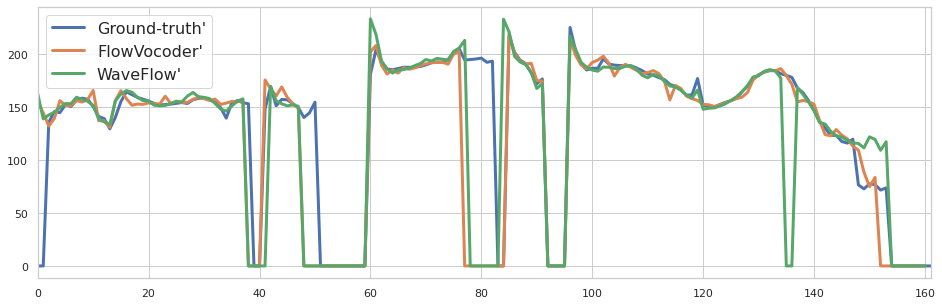

In [71]:
sr, y = wavfile.read("../Neural-Vocoder-Experiment/flowvocoder/LJ001-0002.wav")
# assert sr == 16000
y = y.astype(np.float32)
f02 = pysptk.rapt(y.astype(np.float32), fs=sr, hopsize=hop_length, min=60, max=240, otype="f0")
plot(f0, linewidth=3, label="Ground-truth'")
plot(f02, linewidth=3, label="FlowVocoder'")
plot(f03, linewidth=3, label="WaveFlow'")
xlim(0, len(f02))
legend(prop={'size': 16});

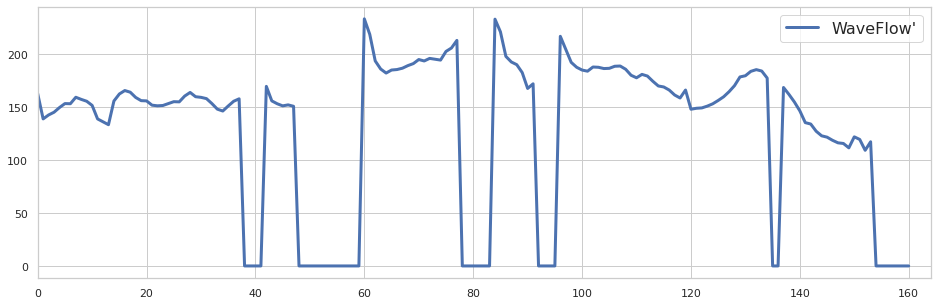

In [69]:
sr, y = wavfile.read("../Neural-Vocoder-Experiment/waveflow/LJ001-0002.wav")
# assert sr == 16000
y = y.astype(np.float32)
f03 = pysptk.rapt(y.astype(np.float32), fs=sr, hopsize=hop_length, min=60, max=240, otype="f0")
# plot(f0, linewidth=3, label="Ground-truth'")
plot(f03, linewidth=3, label="WaveFlow'")
xlim(0, len(f0))
legend(prop={'size': 16});

In [70]:
y_sum = 0
count = 0
for i in range(len(f02)):
    if f02[i] >0 and f0[i]>0:
        y_sum += 1200*np.abs(np.log2(f02[i]) - np.log2(f0[i]))
        count += 1
y_mean = y_sum / count
y_mean

49.438904552924924

In [40]:
49

49